# Image Classification - FASHION MNIST

In [227]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

import tensorflow as tf

In [228]:
tf.__version__

'2.16.1'

In [229]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [230]:
# seperating the training and test dataset df
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

In [231]:
# shape of each dataset
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [232]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

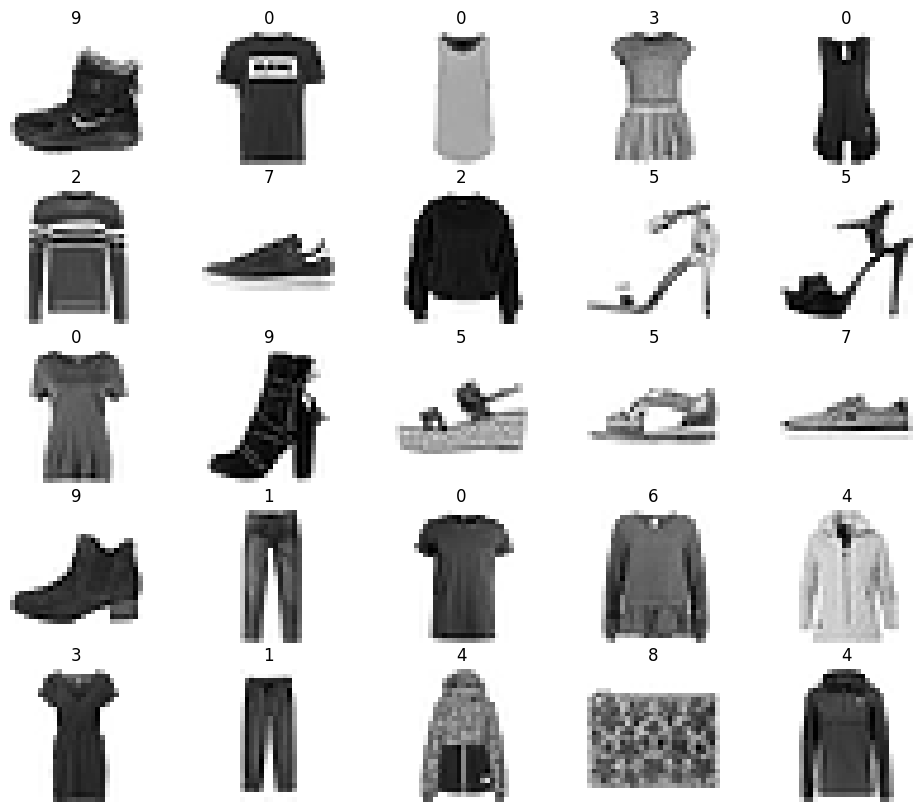

In [233]:
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()


In [234]:
# print class of the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [235]:
len(train_images)


60000

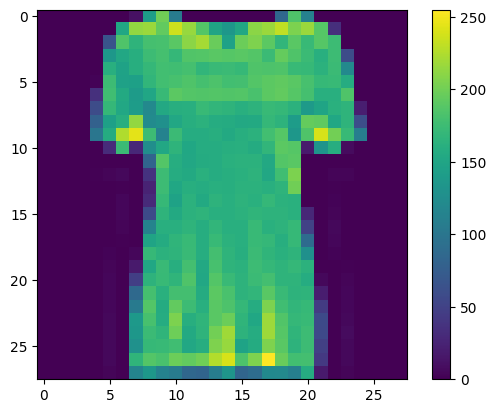

In [236]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False) 
plt.show()

In [237]:
for i in train_images[10]:
    for pixel in i:
        print("{:3}".format(pixel), end=" ")
    print()

  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0 
  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0 
  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0 
  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0 
  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0 
  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0 
  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0 
  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0 
  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 141 195 193 152 166 

In [238]:
train_images = train_images / 255
test_images = test_images / 255

In [239]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [240]:
for i in train_images[10]:
    for pixel in i:
        print("{:0.2f}".format(pixel), end=" ")
    print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.04 0.56 0.78 0.42 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.33 0.73 0.44 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.60 0.84 0.85 0.76 0.93 0.85 0.73 0.58 0.53 0.60 0.83 0.85 0.91 0.80 0.85 0.74 0.13 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.26 0.73 0.65 0.71 0.71 0.75 0.83 0.87 0.77 0.57 0.78 0.81 0.75 0.66 0.75 0.67 0.74 0.69 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.53 0.60 0.63 0.69 0.71 0.67 0.73 0.73 0.75 0.74 0.75 0.73 0.68 0.76 0.73 0.68 0.63 0.69 0.23 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.63 0.58 0.63 0.67 0.70 0.69 0.71 0.66 0.68 0.68 0.67 0.73 0.72 0.73 0.67 0.67 0.64 0.68 0.47 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.01 0.69 0.57 0.57 0.66 0.70 0.71 0.73 0.71 0.72 0.70 0.70 0.73 0.75 0.76 0.75 0.71 0.67 0.67 0.62 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.14 0.69 0.61 0.55 0.59 0.67 0.75 0.73 0.73 0.73 0.73 0.73 0.71 0.75 0.76 0.74 0.71 0.63 0.63 0.73 0.00 0.00 0.00 0.00 
0.00 0.00 0.0

In [241]:
#reshaping the train and test images
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [242]:
train_images.shape

(60000, 28, 28, 1)

In [243]:
train_images[0].shape

(28, 28, 1)

In [244]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(train_images[0].shape)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │        16,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,010 (66.45 KB)

 Trainable params: 17,010 (66.45 KB)

 Non-trainable params: 0 (0.00 B)

In [245]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_accuracy)
print('Test loss:', test_loss)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7300 - loss: 0.7899
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8620 - loss: 0.3964
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8782 - loss: 0.3527
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8875 - loss: 0.3274
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8922 - loss: 0.3107
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8956 - loss: 0.2992
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8978 - loss: 0.2929
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9010 - loss: 0.2800
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9033 - loss: 0.2768
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.2654
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8948 - loss: 0.3069

Test accuracy: 0.890500009059906
Test loss: 0.305836975574493

In [246]:
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


In [248]:
# evaluate accuracy
correct = 0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == test_labels[i]:
        correct += 1
accuracy = correct / len(y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8905


In [252]:
y_pred[1]

array([5.4449436e-05, 5.7846059e-12, 9.9854690e-01, 4.7352188e-08,
       4.6846963e-04, 3.6969697e-15, 9.3019340e-04, 3.3700172e-18,
       3.7999435e-09, 3.3952141e-13], dtype=float32)

In [251]:
np.argmax(y_pred[1])

2

In [255]:
y_pred[1].max()

0.9985469

In [256]:
test_labels[1]

2